In [2]:
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn

In [7]:
sp500 = yf.Ticker("^GSPC")

In [13]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-29 00:00:00-04:00', '2024-05-30 00:00:00-04:00',
               '2024-05-31 00:00:00-04:00', '2024-06-03 00:00:00-04:00',
               '2024-06-04 00:00:00-04:00', '2024-06-05 00:00:00-04:00',
               '2024-06-06 00:00:00-04:00', '2024-06-07 00:00:00-04:00',
               '2024-06-10 00:00:00-04:00', '2024-06-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24227, freq=None)

<Axes: xlabel='Date'>

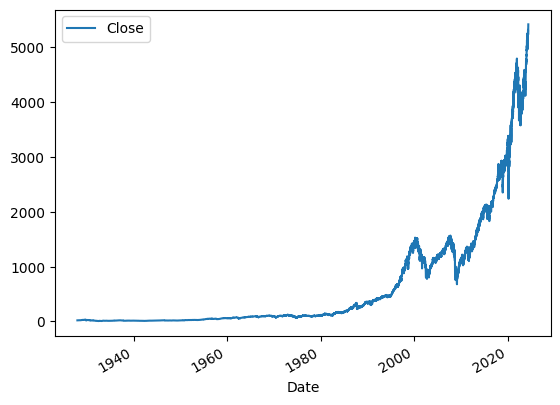

In [14]:
sp500.plot.line(y="Close", use_index = True)

In [15]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [21]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [22]:
sp500 = sp500.loc["1990-01-01":].copy()


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)
train = sp500.iloc[:100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)